In [4]:
#Can I use quantitaive characterics of email to classify them as SPAM/HAM?
#Data set from UCI machine learning repository, available in the KERNLAb pacakge, 
#4600 emails among 58 different variables.  

library(kernlab)
data(spam)
set.seed(3435)


In [5]:
#Taking a random half of dataset in a coinflip way to divide the training and test set. 

trainIndicator = rbinom(4601,size=1, prob =0.5)
table(trainIndicator)

trainIndicator
   0    1 
2314 2287 

In [6]:
#Split the dataset on the test and training set. 

trainSpam = spam[trainIndicator==1,]
testSpam = spam[trainIndicator ==0,]

In [7]:
#Some Exploratory data Analysis
names(trainSpam)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

In [8]:
head(trainSpam)
#Frequency counts of words within each of the email 

,make,address,all,num3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,font,num000,money,hp,hpl,george,num650,lab,labs,telnet,num857,data,num415,num85,technology,num1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
1,0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,spam
7,0,0,0,0,1.92,0,0,0,0,0.64,0.96,1.28,0,0,0,0.96,0,0.32,3.85,0,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.054,0,0.164,0.054,0,1.671,4,112,spam
9,0.15,0,0.46,0,0.61,0,0.3,0,0.92,0.76,0.76,0.92,0,0,0,0,0,0.15,1.23,3.53,2,0,0,0.15,0,0,0,0,0,0,0,0,0.15,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0.271,0,0.181,0.203,0.022,9.744,445,1257,spam
12,0,0,0.25,0,0.38,0.25,0.25,0,0,0,0.12,0.12,0.12,0,0,0,0,0,1.16,0,0.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.022,0.044,0,0.663,0,0,1.243,11,184,spam
14,0,0,0,0,0.9,0,0.9,0,0,0.9,0.9,0,0.9,0,0,0,0,0,2.72,0,0.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.083,7,25,spam
16,0,0.42,0.42,0,1.27,0,0.42,0,0,1.27,0,0,0,0,0,1.27,0,0,1.7,0.42,1.27,0,0,0.42,0,0,0,0,0,0,0,0,0,0,0,0,1.27,0,0,0.42,0,0,0,0,0,0,0,0,0,0.063,0,0.572,0.063,0,5.659,55,249,spam


In [9]:
table(trainSpam$type)


nonspam    spam 
   1381     906 

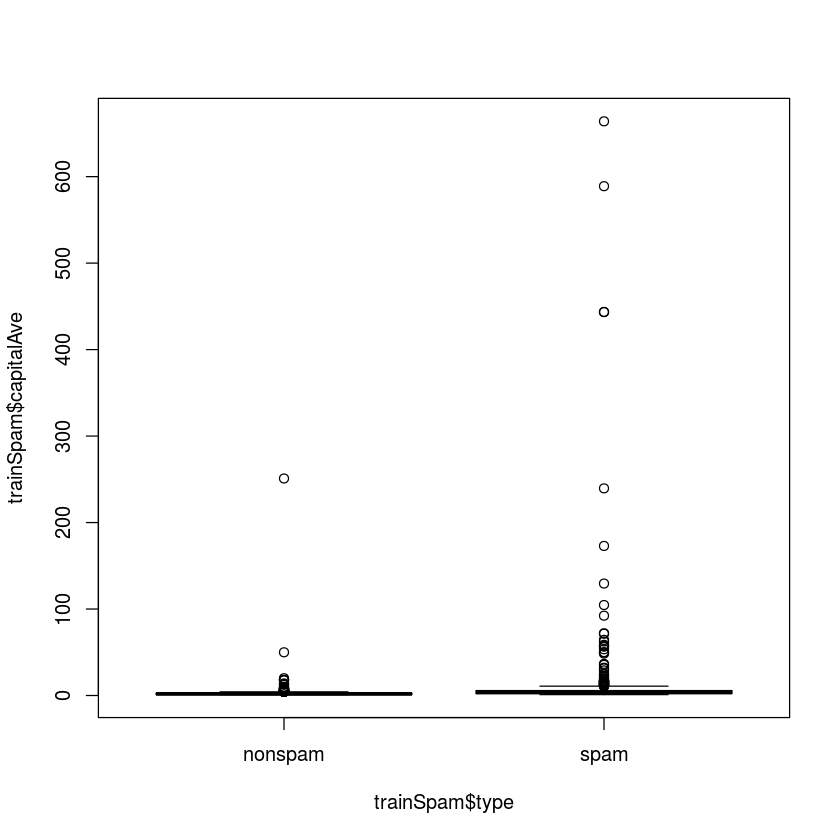

In [10]:
plot(trainSpam$capitalAve ~trainSpam$type)

#Checking plots to see avg frequency of capital square, since data can be skewed might be helpful to take a log

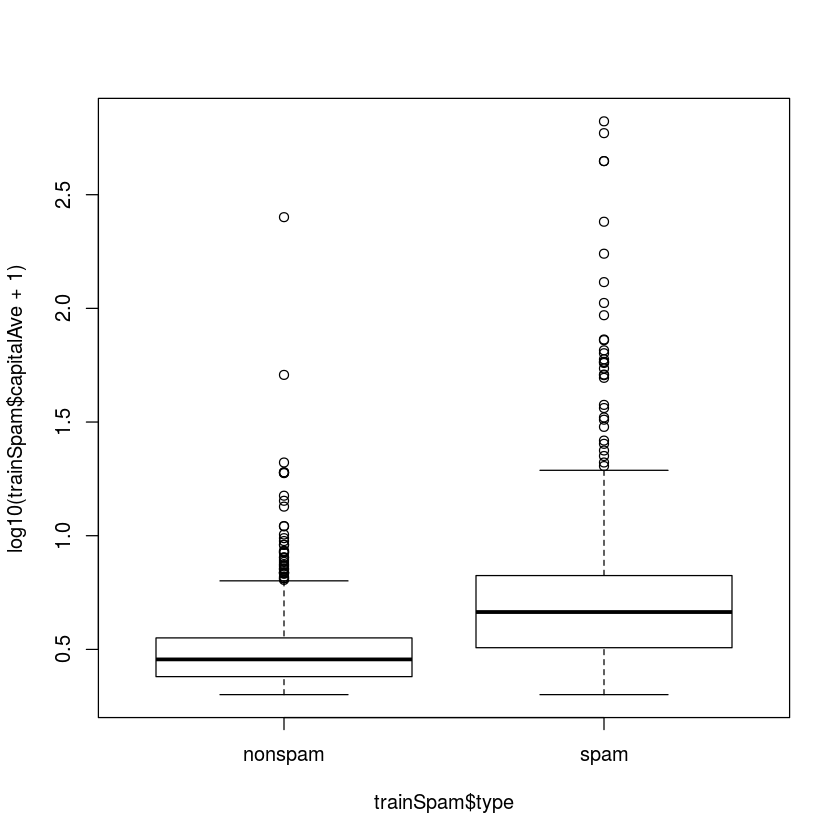

In [11]:
plot(log10(trainSpam$capitalAve +1) ~trainSpam$type)

#Adding 1 because taking a log of zero would result in zero,
#Spam 